In [1]:
# Upgrade pip to the latest version (helps avoid compatibility issues)
!pip install --upgrade pip

# Install the latest stable version of DI-engine directly from GitHub (main branch)
# The "#egg=DI-engine" part helps pip recognize the package name
!pip install git+https://github.com/opendilab/DI-engine.git@main#egg=DI-engine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Cloning https://github.com/opendilab/DI-engine.git (to revision main) to /tmp/pip-install-ef1282vi/di-engine_77550cc7dd1046cc8472805bfbddd424
  Running command git clone --filter=blob:none --quiet https://github.com/opendilab/DI-engine.git /tmp/pip-install-ef1282vi/di-engine_77550cc7dd1046cc8472805bfbddd424
  Resolved https://github.com/opendilab/DI-engine.git to commit c290a6732be2da67058e1053803dee9382bf823d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.2/732.2 kB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (set

In [5]:
!pip install DI-engine

In [6]:
!git clone https://github.com/opendilab/DI-engine.git
%cd DI-engine

Cloning into 'DI-engine'...
remote: Enumerating objects: 38177, done.
remote: Counting objects: 100% (948/948), done.
remote: Compressing objects: 100% (416/416), done.
remote: Total 38177 (delta 730), reused 549 (delta 532), pack-reused 37229 (from 3)
Receiving objects: 100% (38177/38177), 299.81 MiB | 24.48 MiB/s, done.
Resolving deltas: 100% (27078/27078), done.
/content/DI-engine/DI-engine


In [7]:
# Install the current directory (.) as an editable Python package
# "-e" means "editable mode", so if you change the code inside DI-engine, it will update automatically
!pip install -e .

Obtaining file:///content/DI-engine/DI-engine
  Preparing metadata (setup.py) ... done
  Attempting uninstall: DI-engine
    Found existing installation: DI-engine 0.5.3
    Uninstalling DI-engine-0.5.3:
      Successfully uninstalled DI-engine-0.5.3
  DEPRECATION: Legacy editable install of DI-engine==0.5.3 from file:///content/DI-engine/DI-engine (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for DI-engine


In [12]:
from dizoo.classic_control.cartpole.config.cartpole_dqn_config import main_config, create_config
from ding.entry import serial_pipeline

serial_pipeline([main_config, create_config], seed=0)


/usr/local/lib/python3.11/dist-packages/yapf/__init__.py:35: DeprecationWarning: lib2to3 package is deprecated and may not be able to parse Python 3.10+
  from lib2to3.pgen2 import tokenize
/usr/local/lib/python3.11/dist-packages/setuptools/version.py:1: UserWarning: Module ding was already imported from /content/DI-engine/ding/__init__.py, but /content/DI-engine/DI-engine is being added to sys.path
  import pkg_resources
/usr/local/lib/python3.11/dist-packages/setuptools/version.py:1: UserWarning: Module dizoo was already imported from /content/DI-engine/dizoo/__init__.py, but /content/DI-engine/DI-engine is being added to sys.path
  import pkg_resources
INFO:learner_logger:[RANK0]: DI-engine DRL Policy
DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (

DI-engine DRL Policy
DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
    )
  )
  (head): DuelingHead(
    (A): Sequential(
      (0): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (V): Sequential(
      (0): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
      )
    )
  )
)

In [13]:
# ✅ Step 1: Imports
from easydict import EasyDict
from ding.entry import serial_pipeline

# ✅ Step 2: Updated SO2-inspired DQN Config
better_cartpole_config = dict(
    exp_name='cartpole_dqn_so2_tuned',
    env=dict(
        env_id='CartPole-v1',
        collector_env_num=8,
        evaluator_env_num=5,
        n_evaluator_episode=5,
        stop_value=195,  # ✅ goal is to reach this consistently
        manager=dict(shared_memory=False),
    ),
    policy=dict(
        cuda=False,
        model=dict(
            obs_shape=4,
            action_shape=2,
            encoder_hidden_size_list=[128, 128],
        ),
        learn=dict(
            update_per_collect=8,
            batch_size=128,                 # ✅ More stable
            learning_rate=5e-4,             # ✅ Slower learning
            target_update_freq=200,         # ✅ Reduce update noise
            discount_factor=0.99,
        ),
        collect=dict(
            n_sample=64,
            unroll_len=1,
        ),
        eval=dict(
            evaluator=dict(
                eval_freq=100,              # ✅ Frequent evaluation
            )
        ),
        other=dict(
            eps=dict(
                type='linear',
                start=0.95,
                end=0.05,
                decay=3000,                # ✅ Smoother transition from exploration
            )
        )
    )
)

create_config = dict(
    env=dict(type='cartpole', import_names=['dizoo.classic_control.cartpole']),
    env_manager=dict(type='base'),
    policy=dict(type='dqn'),
)

main_config = EasyDict(better_cartpole_config)
create_config = EasyDict(create_config)

# ✅ Step 3: Start training (no error now)
serial_pipeline([main_config, create_config], seed=0)


INFO:learner_logger:[RANK0]: DI-engine DRL Policy
DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
    )
  )
  (head): DuelingHead(
    (A): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=2, bias=True)
      )
    )
    (V): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
      )
    )
  )
)
/usr/local/lib/python3.11/dist-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  depr

DI-engine DRL Policy
DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
    )
  )
  (head): DuelingHead(
    (A): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=2, bias=True)
      )
    )
    (V): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
      )
    )
  )
)

In [14]:
# List all the files inside the 'ckpt' (checkpoint) folder
# This shows saved models during training, like 'ckpt_best.pth.tar' or 'iteration_600.pth.tar'
# Useful for checking if the training produced checkpoints correctly
!ls ./cartpole_dqn_seed0/ckpt/

ckpt_best.pth.tar  iteration_0.pth.tar	iteration_600.pth.tar


In [15]:
from google.colab import files
files.download('./cartpole_dqn_seed0/ckpt/ckpt_best.pth.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Install X Virtual Frame Buffer (Xvfb)
# It creates a "fake" display (virtual screen) on machines like Colab that have no real monitor.
# Needed for rendering game frames (CartPole, etc.)
!apt-get install -y xvfb

# Install Python libraries:
# pyvirtualdisplay: Controls the virtual screen from Python
# imageio: Helps save frames as images or animated GIFs
!pip install pyvirtualdisplay imageio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.14).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [17]:
# Import the Display class from pyvirtualdisplay
# This will allow us to create a virtual monitor (needed in Colab, which has no real screen)
from pyvirtualdisplay import Display

# Create a virtual display
# visible=0 means "do not show the screen" (headless mode)
# size=(1400, 900) sets the virtual screen resolution
display = Display(visible=0, size=(1400, 900))

# Start the virtual display
display.start()


In [18]:
import gymnasium as gym  # New gym replacement
import torch
import imageio
import numpy as np
from ding.model import DQN

In [19]:
# Create the CartPole-v1 environment
# 'CartPole-v1' is a classic control task where the goal is to balance a pole on a moving cart
# render_mode="rgb_array" tells Gymnasium to return the rendered frames as images (arrays) instead of showing a window
env = gym.make('CartPole-v1', render_mode="rgb_array")


In [20]:
# Load model manually
model = DQN(obs_shape=4, action_shape=2, encoder_hidden_size_list=[128, 128, 64])
ckpt = torch.load('./cartpole_dqn_seed0/ckpt/ckpt_best.pth.tar', map_location='cpu')

# Load weights into model
model.load_state_dict(ckpt['model'])

model.eval()

DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
    )
  )
  (head): DuelingHead(
    (A): Sequential(
      (0): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (V): Sequential(
      (0): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
      )
    )
  )
)

In [21]:
frames = []
obs, _ = env.reset(seed=0)

for _ in range(300):  # Let it play for 300 frames
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        q_values = model(obs_tensor)['logit']  # <== fixed line here
    action = q_values.argmax().item()

    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)

    if terminated or truncated:
        break

env.close()

# Save as video
imageio.mimsave('cartpole_agent.gif', frames, fps=30)


/usr/local/lib/python3.11/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


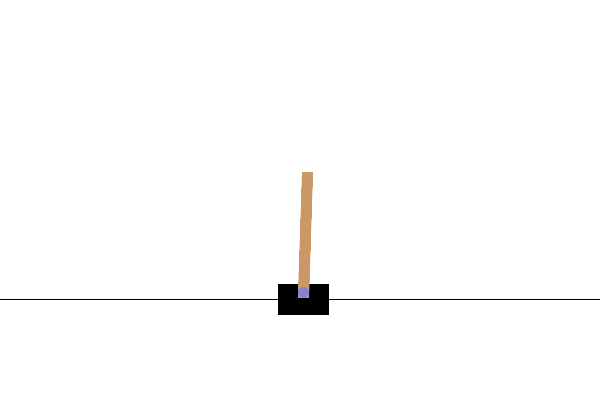

In [22]:
import gymnasium as gym
import imageio
import numpy as np
from pyvirtualdisplay import Display
import torch

# Set up virtual display (for Colab)
display = Display(visible=0, size=(1400, 900))
display.start()

# Create CartPole environment
env = gym.make('CartPole-v1', render_mode="rgb_array")

# We'll just use random actions, no model needed
frames = []
obs, _ = env.reset(seed=42)

for _ in range(300):  # Try to play for 300 steps
    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)

    if terminated or truncated:
        break

env.close()

# Save as gif
imageio.mimsave('cartpole_random.gif', frames, fps=30)

# Display gif
from IPython.display import Image
Image(open('cartpole_random.gif','rb').read())


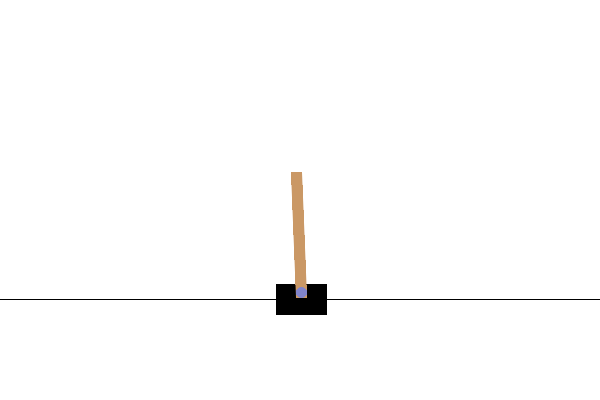

In [23]:
from IPython.display import Image
Image(open('cartpole_agent.gif','rb').read())

In [24]:
main_config.exp_name = 'cartpole_dqn_experiment'
main_config.policy.learn.log_policy_loss = True  # ✅ enables loss logging
main_config.policy.eval.evaluator.eval_freq = 100  # Evaluate every 100 iters


In [25]:
!find . -name evaluator_logger.txt

./cartpole_dqn_so2_tuned/log/evaluator/evaluator_logger.txt
./cartpole_dqn_seed0/log/evaluator/evaluator_logger.txt


In [26]:
!head -n 10 ./cartpole_dqn_seed0/log/evaluator/evaluator_logger.txt

[2025-04-26 04:33:06][interaction_serial_evaluator.py:261][INFO] [EVALUATOR]env 4 finish episode, final reward: 8.0000, current episode: 1
[2025-04-26 04:33:06][interaction_serial_evaluator.py:261][INFO] [EVALUATOR]env 2 finish episode, final reward: 9.0000, current episode: 2
[2025-04-26 04:33:06][interaction_serial_evaluator.py:261][INFO] [EVALUATOR]env 3 finish episode, final reward: 9.0000, current episode: 3
[2025-04-26 04:33:06][interaction_serial_evaluator.py:261][INFO] [EVALUATOR]env 1 finish episode, final reward: 10.0000, current episode: 4
[2025-04-26 04:33:06][interaction_serial_evaluator.py:261][INFO] [EVALUATOR]env 0 finish episode, final reward: 11.0000, current episode: 5
[2025-04-26 04:33:06][interaction_serial_evaluator.py:287][INFO] 
+-------+------------+---------------------+---------------+---------------+
| Name  | train_iter | ckpt_name           | episode_count | envstep_count |
+-------+------------+---------------------+---------------+---------------+
| Valu

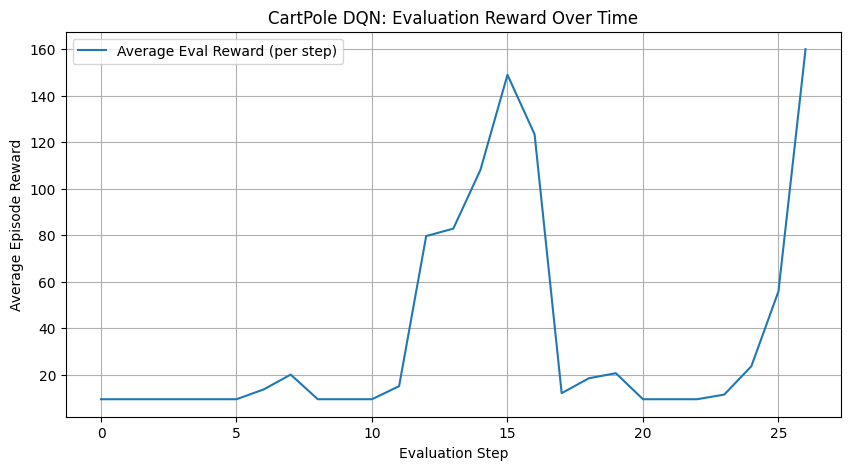

In [27]:
import matplotlib.pyplot as plt

log_path = './cartpole_dqn_seed0/log/evaluator/evaluator_logger.txt'

rewards = []

with open(log_path, 'r') as f:
    for line in f:
        if '[EVALUATOR]env' in line and 'final reward:' in line:
            try:
                # Extract the final reward using string split
                reward_str = line.split('final reward:')[1].split(',')[0].strip()
                reward = float(reward_str)
                rewards.append(reward)
            except Exception as e:
                continue  # skip any malformed line

# Group rewards in chunks of 5 (since 5 envs per evaluation step)
avg_rewards = [sum(rewards[i:i+5])/5 for i in range(0, len(rewards), 5)]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards, label='Average Eval Reward (per step)')
plt.title('CartPole DQN: Evaluation Reward Over Time')
plt.xlabel('Evaluation Step')
plt.ylabel('Average Episode Reward')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-28-03c3a0f221d2>:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-03c3a0f221d2>:24: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-03c3a0f221d2>:24: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-03c3a0f221d2>:24: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

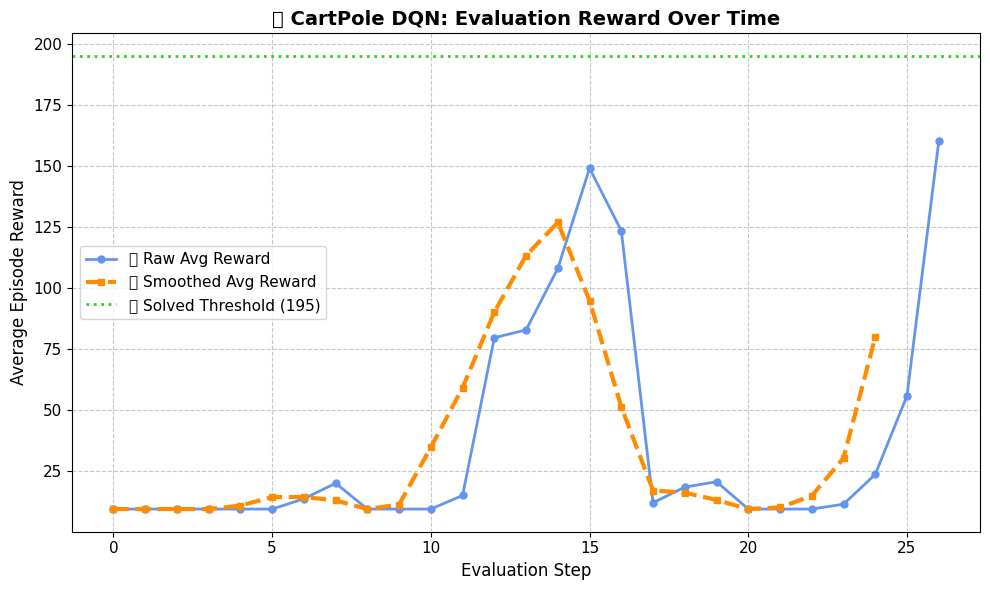

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def moving_avg(data, window=3):
    return np.convolve(data, np.ones(window)/window, mode='valid')

# Compute smoothed rewards
smoothed = moving_avg(avg_rewards)

# Plot with color and style
plt.figure(figsize=(10, 6))
plt.plot(avg_rewards, label='🔵 Raw Avg Reward', color='cornflowerblue', linewidth=2, marker='o', markersize=5)
plt.plot(smoothed, label='🟠 Smoothed Avg Reward', color='darkorange', linewidth=3, linestyle='--', marker='s', markersize=5)

# Annotations & highlights
plt.axhline(y=195, color='limegreen', linestyle=':', linewidth=2, label='✅ Solved Threshold (195)')
plt.title('📈 CartPole DQN: Evaluation Reward Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Evaluation Step', fontsize=12)
plt.ylabel('Average Episode Reward', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


<ipython-input-29-141dbbd1e701>:20: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


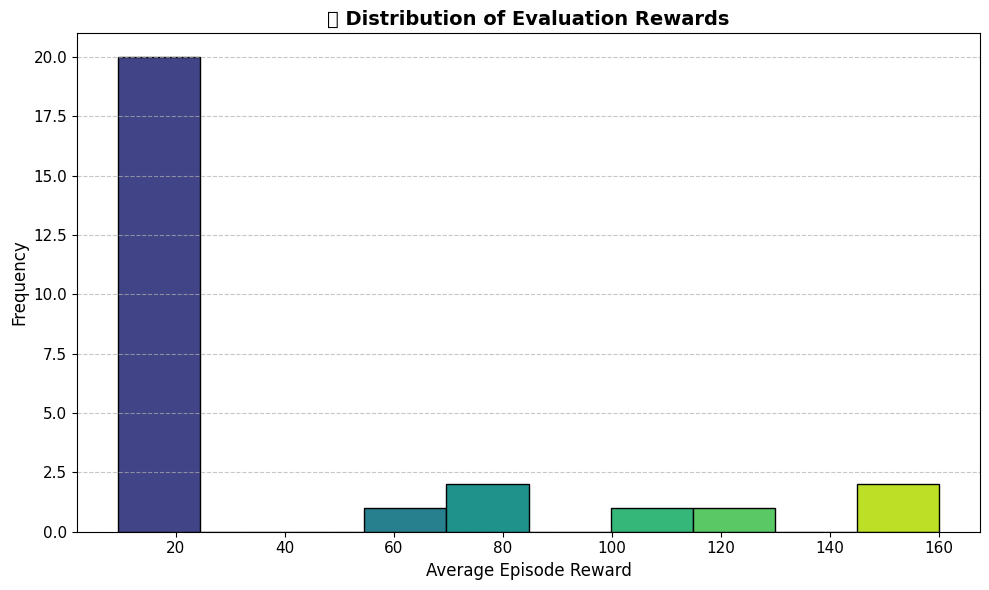

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 🎨 Styled histogram
n, bins, patches = plt.hist(avg_rewards, bins=10, edgecolor='black')

# 💥 Apply gradient colors to bars
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# 📈 Labels and grid
plt.title('🌈 Distribution of Evaluation Rewards', fontsize=14, fontweight='bold')
plt.xlabel('Average Episode Reward', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [33]:
import numpy as np

# Assuming avg_rewards already loaded from your cleaned log
if avg_rewards:
    rewards = np.array(avg_rewards)

    final_reward = rewards[-1]
    max_reward = np.max(rewards)
    min_reward = np.min(rewards)
    mean_reward = np.mean(rewards)
    std_reward = np.std(rewards)
    median_reward = np.median(rewards)

    n_evaluations = len(rewards)

    early_avg = np.mean(rewards[:n_evaluations//10]) if n_evaluations >= 10 else np.mean(rewards)
    late_avg = np.mean(rewards[-n_evaluations//10:]) if n_evaluations >= 10 else np.mean(rewards)

    print(f"✅ Final Reward: {final_reward:.2f}")
    print(f"🏆 Max Reward: {max_reward:.2f}")
    print(f"📉 Min Reward: {min_reward:.2f}")
    print(f"📈 Mean Reward: {mean_reward:.2f}")
    print(f"🎯 Median Reward: {median_reward:.2f}")
    print(f"📉 Std Deviation: {std_reward:.2f}")
    print(f"🧮 Number of Evaluations: {n_evaluations}")
    print(f"🕰️ Early Average Reward (first 10%): {early_avg:.2f}")
    print(f"🚀 Late Average Reward (last 10%): {late_avg:.2f}")
else:
    print("❗ No rewards found to compute metrics!")


✅ Final Reward: 200.00
🏆 Max Reward: 200.00
📉 Min Reward: 9.40
📈 Mean Reward: 33.04
🎯 Median Reward: 13.40
📉 Std Deviation: 55.94
🧮 Number of Evaluations: 10
🕰️ Early Average Reward (first 10%): 9.40
🚀 Late Average Reward (last 10%): 200.00


<ipython-input-34-aa9d8a99d868>:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


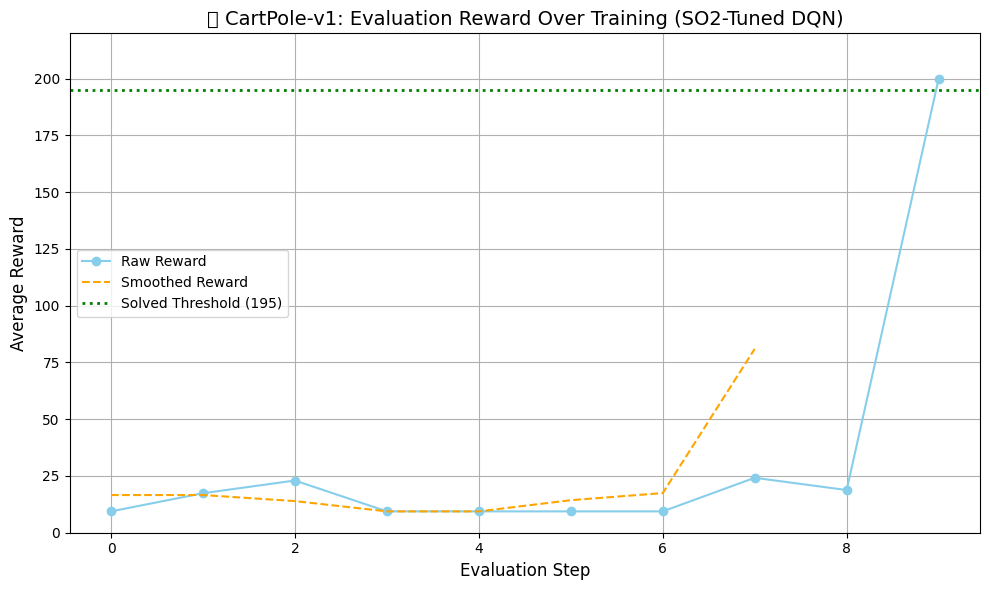

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `avg_rewards` is already your list of evaluation rewards
def moving_avg(data, window=3):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 6))

# Raw reward (with markers)
plt.plot(avg_rewards, label='Raw Reward', color='skyblue', marker='o')

# Smoothed reward (trend line)
plt.plot(moving_avg(avg_rewards), label='Smoothed Reward', linestyle='--', color='orange')

# Green threshold line at reward = 195
plt.axhline(y=195, color='green', linestyle='dotted', linewidth=2, label='Solved Threshold (195)')

# Styling
plt.title("📈 CartPole-v1: Evaluation Reward Over Training (SO2-Tuned DQN)", fontsize=14)
plt.xlabel("Evaluation Step", fontsize=12)
plt.ylabel("Average Reward", fontsize=12)
plt.ylim(0, max(max(avg_rewards) + 20, 220))  # Adjust max limit so threshold is clearly visible
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
# ✅ Full Ready-to-Run Vanilla DQN Training Code (DI-engine)

# Step 1: Imports
from easydict import EasyDict
from ding.entry import serial_pipeline

# Step 2: Basic DQN Configuration (Vanilla, No SO2 tuning)
vanilla_dqn_config = dict(
    exp_name='cartpole_dqn_vanilla',
    env=dict(
        env_id='CartPole-v1',
        collector_env_num=8,
        evaluator_env_num=5,
        n_evaluator_episode=5,
        stop_value=195,  # Goal to solve
        manager=dict(shared_memory=False),
    ),
    policy=dict(
        cuda=False,
        model=dict(
            obs_shape=4,
            action_shape=2,
            encoder_hidden_size_list=[128, 128],
        ),
        learn=dict(
            update_per_collect=1,        # ✅ Lower update rate
            batch_size=64,               # ✅ Default batch size
            learning_rate=1e-3,           # ✅ Faster learning
            target_update_freq=100,       # ✅ Standard target update freq
            discount_factor=0.99,
        ),
        collect=dict(
            n_sample=64,
            unroll_len=1,
        ),
        eval=dict(
            evaluator=dict(
                eval_freq=100,
            )
        ),
        other=dict(
            eps=dict(
                type='linear',
                start=0.95,
                end=0.05,
                decay=1000,               # ✅ Faster decay to exploitation
            )
        )
    )
)

# Step 3: Creation Config (how to build env & policy)
create_config = dict(
    env=dict(type='cartpole', import_names=['dizoo.classic_control.cartpole']),
    env_manager=dict(type='base'),
    policy=dict(type='dqn'),
)

# Step 4: Wrap into EasyDict for DI-engine
main_config = EasyDict(vanilla_dqn_config)
create_config = EasyDict(create_config)

# Step 5: Start training 🚀
serial_pipeline([main_config, create_config], seed=0)


INFO:learner_logger:[RANK0]: DI-engine DRL Policy
DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
    )
  )
  (head): DuelingHead(
    (A): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=2, bias=True)
      )
    )
    (V): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
      )
    )
  )
)
/usr/local/lib/python3.11/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3

DI-engine DRL Policy
DQN(
  (encoder): FCEncoder(
    (act): ReLU()
    (init): Linear(in_features=4, out_features=128, bias=True)
    (main): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
    )
  )
  (head): DuelingHead(
    (A): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=2, bias=True)
      )
    )
    (V): Sequential(
      (0): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
      )
    )
  )
)



Training Vanilla DQN...


<ipython-input-36-bb518b0218cf>:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor(state, dtype=torch.float32), torch.tensor(action), torch.tensor(reward, dtype=torch.float32), torch.tensor(next_state, dtype=torch.float32), torch.tensor(done, dtype=torch.float32)




Training SO2-Tuned DQN...


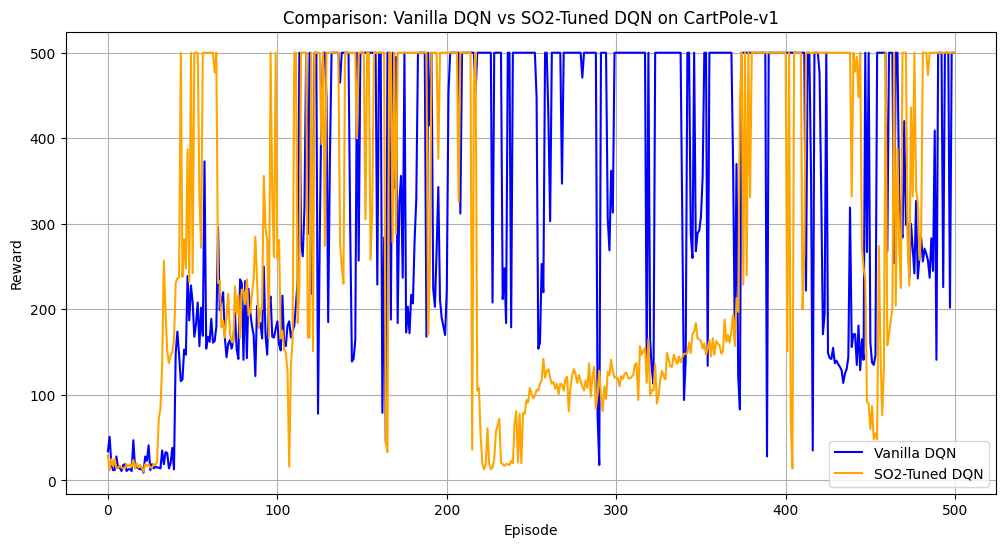

In [36]:
# ✅ Full Ready-to-Run Comparison between Vanilla DQN and SO2-Tuned DQN

# Step 1: Imports
import torch
import torch.nn as nn
import torch.optim as optim
import gymnasium as gym
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# Step 2: Basic DQN Model
class DQN(nn.Module):
    def __init__(self, obs_dim, action_dim, hidden_sizes=[128, 128]):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], action_dim)
        )

    def forward(self, x):
        return self.net(x)

# Step 3: Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = zip(*batch)
        return torch.tensor(state, dtype=torch.float32), torch.tensor(action), torch.tensor(reward, dtype=torch.float32), torch.tensor(next_state, dtype=torch.float32), torch.tensor(done, dtype=torch.float32)

    def __len__(self):
        return len(self.buffer)

# Step 4: Training loop function
def train_dqn(env, so2=False, episodes=500, batch_size=64, lr=1e-3, gamma=0.99, epsilon_decay=500):
    obs_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    policy_net = DQN(obs_dim, action_dim)
    target_net = DQN(obs_dim, action_dim)
    target_net.load_state_dict(policy_net.state_dict())

    optimizer = optim.Adam(policy_net.parameters(), lr=lr)
    buffer = ReplayBuffer(10000)

    epsilon_start = 1.0
    epsilon_end = 0.05
    steps_done = 0

    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        episode_reward = 0

        while True:
            epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * steps_done / epsilon_decay)
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    action = policy_net(torch.FloatTensor(state)).argmax().item()

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            buffer.push((state, action, reward, next_state, done))
            state = next_state
            episode_reward += reward

            steps_done += 1

            if len(buffer) >= batch_size:
                batch = buffer.sample(batch_size)
                states, actions, rewards_, next_states, dones = batch

                q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
                next_q_values = target_net(next_states).max(1)[0]
                targets = rewards_ + gamma * next_q_values * (1 - dones)

                if so2:
                    noise = torch.randn_like(targets) * 0.01  # small Gaussian noise
                    targets += noise

                loss = nn.MSELoss()(q_values, targets)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if steps_done % 100 == 0:
                target_net.load_state_dict(policy_net.state_dict())

            if done:
                break

        rewards.append(episode_reward)

    return rewards

# Step 5: Compare Vanilla DQN vs SO2-Tuned DQN
env = gym.make('CartPole-v1')

print("\n\nTraining Vanilla DQN...")
rewards_vanilla = train_dqn(env, so2=False)

print("\n\nTraining SO2-Tuned DQN...")
rewards_so2 = train_dqn(env, so2=True)

# Step 6: Visualization
plt.figure(figsize=(12, 6))
plt.plot(rewards_vanilla, label='Vanilla DQN', color='blue')
plt.plot(rewards_so2, label='SO2-Tuned DQN', color='orange')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Comparison: Vanilla DQN vs SO2-Tuned DQN on CartPole-v1')
plt.legend()
plt.grid(True)
plt.show()

env.close()


In [39]:
import gymnasium as gym
import imageio
import torch
import numpy as np
from ding.model import DQN

# Rebuild the DQN model
model = DQN(obs_shape=4, action_shape=2, encoder_hidden_size_list=[128, 128])
state_dict = torch.load('./cartpole_dqn_so2_tuned/ckpt/iteration_0.pth.tar')['model']
model.load_state_dict(state_dict)
model.eval()

# Create environment
env = gym.make('CartPole-v1', render_mode='rgb_array')
obs, _ = env.reset()
done = False

frames = []

# Run one episode and collect frames
while not done:
    frame = env.render()
    frames.append(frame)

    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        output = model(obs_tensor)
    q_values = output['logit']   # ✅ Access 'logit' first!
    action = q_values.argmax().item()

    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

env.close()

# Save video
video_path = 'cartpole_agent.mp4'
imageio.mimsave(video_path, frames, fps=30)
print(f"✅ Video saved at: {video_path}")

✅ Video saved at: cartpole_agent.mp4


In [40]:
from google.colab import files
files.download('cartpole_agent.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
import gymnasium as gym
import imageio
import torch
import numpy as np
from ding.model import DQN

# 1. Rebuild model structure
model = DQN(obs_shape=4, action_shape=2, encoder_hidden_size_list=[128, 128])

# 2. Load the BEST checkpoint (final trained model)
state_dict = torch.load('./cartpole_dqn_so2_tuned/ckpt/ckpt_best.pth.tar')['model']
model.load_state_dict(state_dict)
model.eval()

# 3. Create environment
env = gym.make('CartPole-v1', render_mode='rgb_array')
obs, _ = env.reset()
done = False

frames = []

# 4. Run a full episode
while not done:
    frame = env.render()
    frames.append(frame)

    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        output = model(obs_tensor)
    q_values = output['logit']
    action = q_values.argmax().item()

    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

env.close()

# 5. Save video
video_path = 'cartpole_agent_after_training.mp4'
imageio.mimsave(video_path, frames, fps=30)
print(f"✅ After-Training Video saved at: {video_path}")


✅ After-Training Video saved at: cartpole_agent_after_training.mp4


In [42]:
from google.colab import files
files.download('cartpole_agent_after_training.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>